In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
# Faz este append para poder importar o fitness_function que está na pasta acima
sys.path.append('../')
sys.path.append('../model')

from fitness_function import RocketFitness, bound_values, fitness_func
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from itertools import product
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid


In [2]:
# Load the data
def read_json_file(path):
    with open(path, 'r') as f:
        list_dict_alg = json.load(f)
    return list_dict_alg

path = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/depso_best_model.json'
dict_alg = read_json_file(path)


In [3]:

def filter_limits(dict_alg, limit_fitness_calls, exec_time_limit):


    # Encontra o indice do melhor indivíduo dentro dos limites estabelecidos

    print(dict_alg['best_ind_list'])
    best_ind_list = np.array(dict_alg['best_ind_list'])
    avg_ind_list = np.array(dict_alg['avg_ind_list'])
    fitness_calls_list = np.array(dict_alg['fitness_calls'])
    exec_time_list = np.array(dict_alg['exec_time_list'])
    total_time = dict_alg['total_time']

    mask = (fitness_calls_list <= limit_fitness_calls) & (exec_time_list <= exec_time_limit)

    best_ind_list = best_ind_list[mask]
    avg_ind_list = avg_ind_list[mask]
    fitness_calls_list = fitness_calls_list[mask]
    exec_time_list = exec_time_list[mask]

    #print(best_ind_list.shape)

    # Cria o dataframe
    df = pd.DataFrame(data={'best_ind': best_ind_list, 'avg_fitness': avg_ind_list, 'fitness_calls': fitness_calls_list, 'exec_time': exec_time_list})
    df['total_time'] = total_time

    # Encontra o melhor fitness do best_ind e seu respectivo fitness médio e adiciona as listas
    melhor_fitness = df['best_ind'].max()
    fitness_medio = df[df['best_ind'] == melhor_fitness]['avg_fitness'].values[0]

    
    return df

df = filter_limits(dict_alg[0], np.inf, np.inf)
    

[0.5, 0.5, 0.5, 0.6286036755021148, 0.6165744860649052, 0.6217303647708119, 0.6354580690216665, 0.6271253732689168, 0.6334245495898645, 0.6347405972591523, 0.634283214838081, 0.6366282971250935, 0.6377442367741094, 0.6389852083968073, 0.6396595078883651, 0.6400308616375929, 0.6415255820635588, 0.6421545729999902, 0.6421452301909392, 0.6423858352474098, 0.6429559435820348, 0.6441985325447046, 0.6447359899288048, 0.6448708631353182, 0.6449052703449305, 0.6452970409430328, 0.6456793402343538, 0.6456533090773058, 0.6453826008309169, 0.6457704822108726, 0.6458863689501075, 0.6460049898817803, 0.6462557416556325, 0.6463953559071233, 0.6464418085624285, 0.6466437152969627, 0.6465786916487732, 0.6466088597206662, 0.6467151136963147, 0.6468486697924402, 0.6469250254166026, 0.6469612119297441, 0.646979130690634, 0.6469751554985476, 0.6469809277098968, 0.6469948568668111, 0.6470039744519936, 0.6470209814083747, 0.647016223589585, 0.6470389190752541]


In [4]:
df = df.loc[df['best_ind'] > 0]
# Cria uma coluna "best_known" com o melhor fitness conhecido, que é um max() cumulativo
df['best_known'] = df['best_ind'].cummax()
# encontra o melhor individuo
best_ind = df['best_ind'].max()
print(best_ind)
# Encontra o número de chamadas de fintess em que o best_ind ocorre a primeira vez
fitness_calls = df.loc[df['best_ind'] == best_ind]['fitness_calls'].values[0]
print( fitness_calls )
# Encontra o índice da linha em que o best_ind ocorre a primeira vez
index = df.loc[df['best_ind'] == best_ind].index[0]


0.6470389190752541
103.0


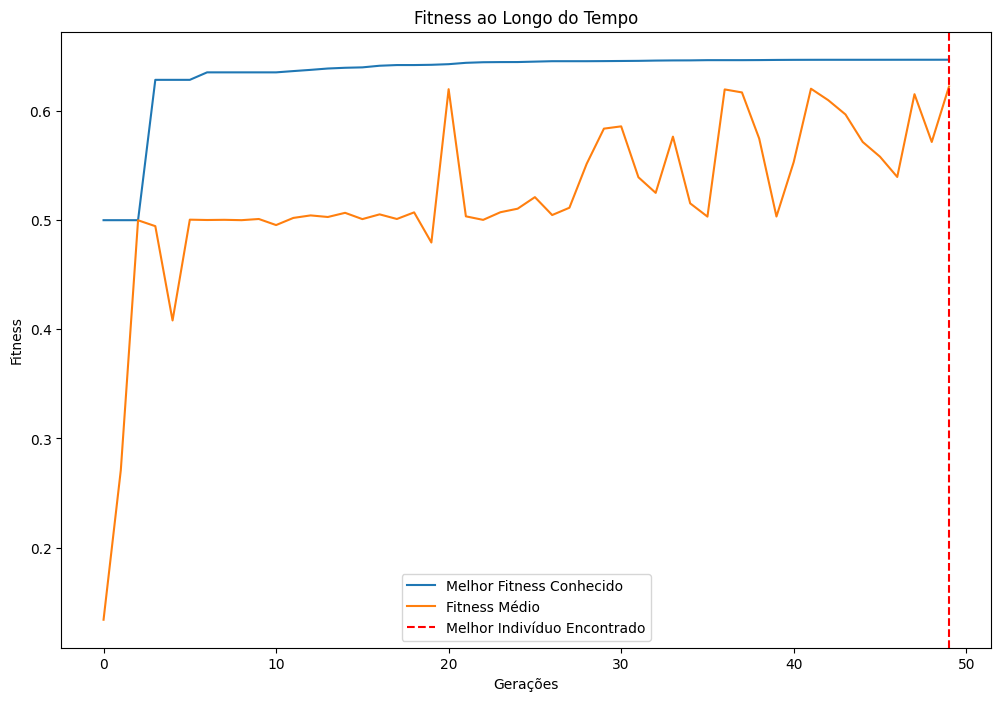

In [5]:
# Faz a visualização do gráfico de treinamento do modelo atraés do dataframe df
# mostrando o best_ind e o avg_fitness ao longo do tempo
plt.figure(figsize=(12, 8))
plt.plot(df['best_known'], label='Melhor Fitness Conhecido')
plt.plot(df['avg_fitness'], label='Fitness Médio')
plt.axvline(index, color='red', linestyle='--', label='Melhor Indivíduo Encontrado')
plt.title('Fitness ao Longo do Tempo')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.legend()
plt.show()

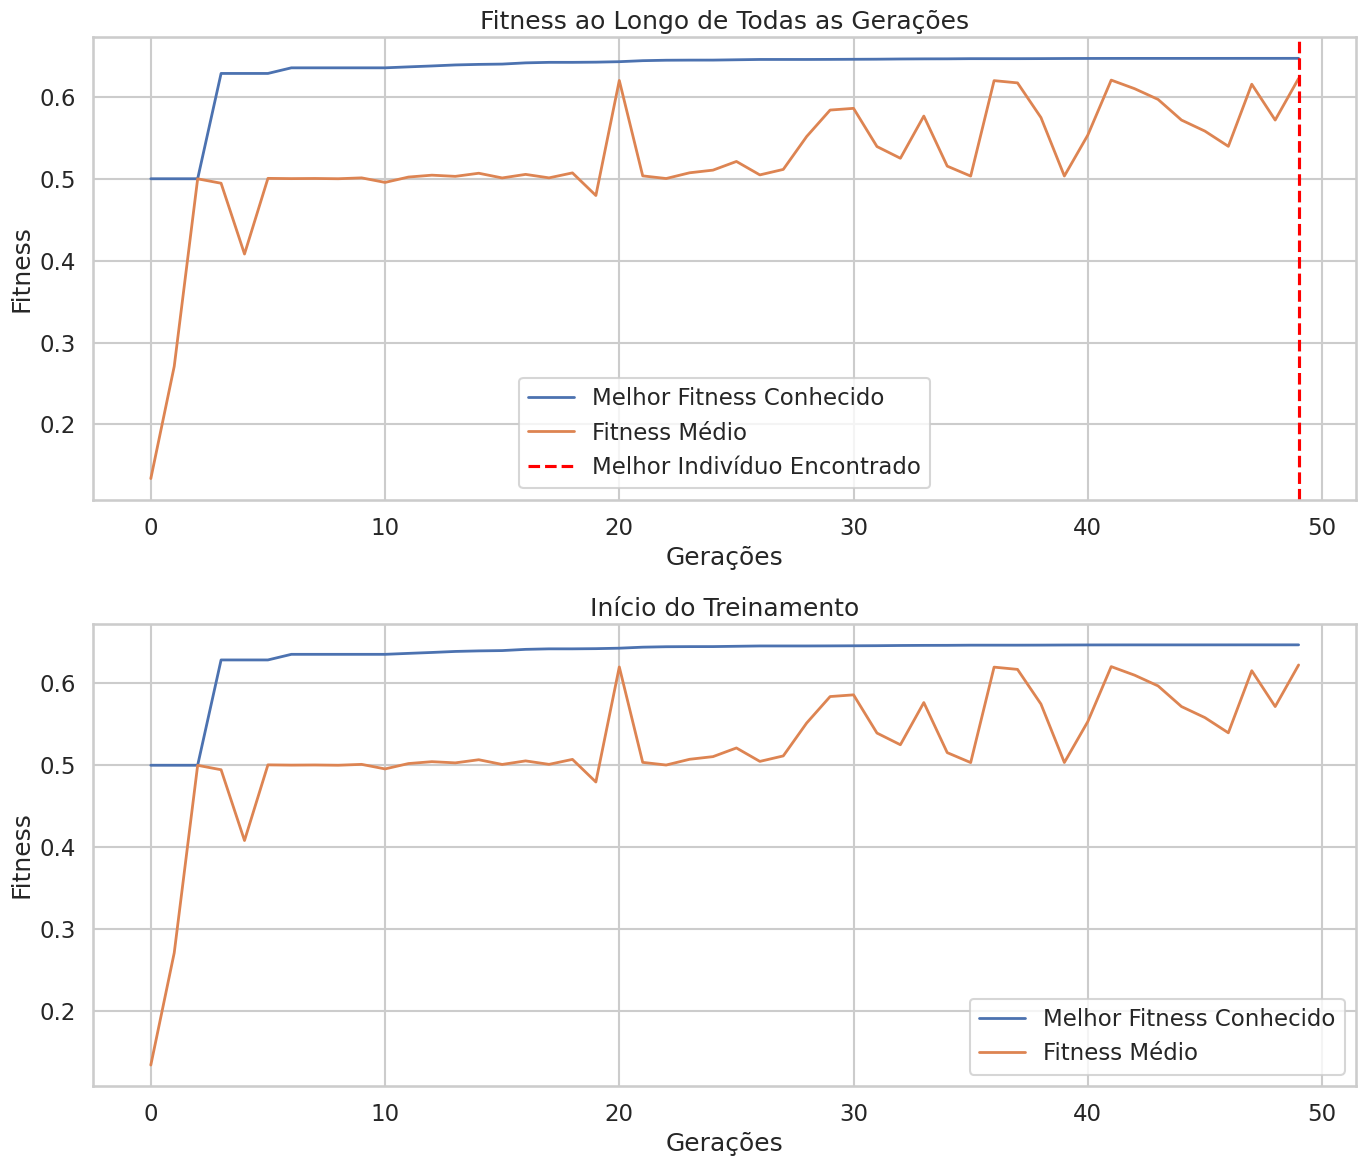

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que df seja o seu DataFrame
# df = pd.read_csv('seu_arquivo.csv') # Exemplo de como carregar o DataFrame

sns.set_theme(context='talk', style='whitegrid') # Configura o tema com Seaborn para um look mais acadêmico

fig, axes = plt.subplots(2, 1, figsize=(14, 12)) # Cria uma figura com duas subfiguras (subplots)

# Plot para o treinamento completo
axes[0].plot(df['best_known'], label='Melhor Fitness Conhecido', linewidth=2)
axes[0].plot(df['avg_fitness'], label='Fitness Médio', linewidth=2)
axes[0].axvline(index, color='red', linestyle='--', label='Melhor Indivíduo Encontrado')
axes[0].set_title('Fitness ao Longo de Todas as Gerações')
axes[0].set_xlabel('Gerações')
axes[0].set_ylabel('Fitness')
axes[0].legend()

# Plot para visualizar apenas o início do treinamento
inicio_treinamento = 100 # Ajuste este valor para quantas gerações você quer visualizar no começo
axes[1].plot(df['best_known'][:inicio_treinamento], label='Melhor Fitness Conhecido', linewidth=2)
axes[1].plot(df['avg_fitness'][:inicio_treinamento], label='Fitness Médio', linewidth=2)
#axes[1].axvline(index if index < inicio_treinamento else -1, color='red', linestyle='--', label='Melhor Indivíduo Encontrado' if index < inicio_treinamento else '')
axes[1].set_title('Início do Treinamento')
axes[1].set_xlabel('Gerações')
axes[1].set_ylabel('Fitness')
axes[1].legend()

plt.tight_layout() # Ajusta automaticamente os subplots para que caibam na figura
plt.show()


In [7]:
dict_alg[0]['best_solutions']
# Encontra a best_solution que está associada ao mesmo número de chamadas de fitness
best_solution = len(dict_alg[0]['best_solutions'])
print(best_solution)

2000


In [8]:
rocket_fitness = RocketFitness(bound_values, num_workers=4)
random_values = np.random.rand(100,10)
fitness_func_class = rocket_fitness.calc_fitness


In [9]:
fitness_val  = fitness_func_class(np.array(dict_alg[0]['best_solutions']))


In [10]:
best_ind_space = np.array(dict_alg[0]['best_solutions'][fitness_val.argmax()])
print(best_ind_space)
print(fitness_val.argmax())

[0.76946657 0.70802406 0.24594214 1.         0.6476385  0.52780479
 0.14545894 0.04346814 0.18289649 0.32073086]
1031


In [11]:
min_mat = bound_values.T[0, :]
max_mat = bound_values.T[1,:]
best_sol_denorm = best_ind_space * (max_mat - min_mat) + min_mat
print(best_sol_denorm)
# Printa o que é cada valor
print("Comb Pressure (Superior): ", best_sol_denorm[0])
print("MR (Superior): ", best_sol_denorm[1])
print("nozzle Diam (Superior): ", best_sol_denorm[2])
print("eps (Superior): ", best_sol_denorm[3])
print("Comb Pressure (Inferior): ", best_sol_denorm[4])
print("MR (Inferior): ", best_sol_denorm[5])
print("nozzle Diam (Inferior): ", best_sol_denorm[6])
print("eps (Inferior): ", best_sol_denorm[7])
print("Raio (Superior): ", best_sol_denorm[8])
print("Raio (Inferior): ", best_sol_denorm[9])

[9.46413231e+06 2.91604812e+00 2.24594214e-01 2.00000000e+02
 8.12402354e+06 2.55560958e+00 2.14545894e-01 1.06066912e+01
 1.91448244e+00 2.60365431e+00]
Comb Pressure (Superior):  9464132.31348059
MR (Superior):  2.91604812230707
nozzle Diam (Superior):  0.2245942144277389
eps (Superior):  200.0
Comb Pressure (Inferior):  8124023.536926896
MR (Inferior):  2.5556095800673786
nozzle Diam (Inferior):  0.2145458937267633
eps (Inferior):  10.606691189531762
Raio (Superior):  1.914482437634292
Raio (Inferior):  2.6036543110315584


In [12]:

import numpy as np
from model.build_rocket import RocketModel
import sys, os
import math
import concurrent.futures
import timeit
import multiprocessing
from functools import partial
import joblib
import time
from rocketcea.cea_obj_w_units import CEA_Obj


#reg_path = '/home/ubuntu/Mestrado/modelo_foguete/model/engines/decision_tree_model.pkl'
#reg_model = joblib.load(reg_path)
reg_model = False
cea_obj = ceaObj = CEA_Obj( oxName='LOX', fuelName='RP-1', pressure_units='MPa', cstar_units='m/s', temperature_units='K')


def fitness_func(parameters_list):
    #parameters_list = denormalize(parameters_list, bounds)
    engineParams = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[0],
                    "MR": parameters_list[1],
                    "nozzleDiam": parameters_list[2],
                    "eps": parameters_list[3]}

    engineParamsFirst = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[4],
                    "MR": parameters_list[5],
                    "nozzleDiam": parameters_list[6],
                    "eps": parameters_list[7]}

    upperStageStructureParams = {"oxName": "LOX",
                                 "fuelName": "RP1",
                                 "MR": parameters_list[1],
                                 "tankPressure": 0.1,
                                 "radius": parameters_list[8],
                                } # 0 porque ainda nao temos esse valor
    firstStageStructureParams = {"oxName": "LOX",
                                "fuelName": "RP1",
                                "MR": parameters_list[5],
                                "tankPressure": 0.1,
                                "radius": parameters_list[9],
                            } # 0 porque ainda nao temos esse valor
    payloadBayParams = {"payloadHeight": 6.7,
                    "payloadRadius": 4.6/2,
                    "payloadMass": 4850,
                    "lowerStageRadius": parameters_list[8],
                    "lowerRocketSurfaceArea": 0} # 0 porque ainda nao temos esse valor

    rocket_model = RocketModel(upperEngineParams=engineParams,
                               firstEngineParams=engineParamsFirst,
                               payloadBayParams=payloadBayParams,
                               upperStageStructureParams=upperStageStructureParams,
                               firstStageStructureParams = firstStageStructureParams,
                               deltaV_upperStage=9000,
                               deltaV_landing=2000,
                               deltaV_firstStage=3000,
                               nEnginesUpperStage=1,
                               nEnignesFirstStage=9,
                               reg_model=reg_model,
                               cea_obj=cea_obj)

    rocket_model.build_all()
    glow = rocket_model.glow
    rocket_model.print_all_parameters()

fitness_func(best_sol_denorm)


***** Payload Bay *****
Cone Area: 37.653733282525664 [kg]
Cylinder Area: 96.82388558363742 [kg]
Frustrum Area: 39.75537708290585 [kg]
Total Payload Fairing Mass: 1614.7826890767185 [kg]
Electronic Mass: 415.7174033267217 [kg]
Power Mass: 96.64182475136299 [kg]
Total Payload Mass: 6977.141917154803 [kg]
***** Upper Stage Engine *****
Isp Vac (s): 379.5863504188533
Isp Sea (s): 220.7455824952777
Mass flow (kg/s): 230.07050301393818
Thrust Vac (kN): 1023.0542614326024
Thrust Sea (kN): 230.7043636778114
***** Upper Stage Structure *****
Ox Tank Cylyndrical Height: 3.2398375273557396 [m]
Fuel Tank Cylyndrical Height: 0.20895763677469018 [m]
Ox Tank Volume: 66.69868127647167 [m3]
Fuel Tank Volume: 31.79900710005298 [m3]
Intertank Structure Mass: 898.6678956299446 [kg]
Separation Explosives Mass: 6.070113467924679 [kg]
Tank Fairing Mass: 592.3654835633165 [kg]
Total Stage Height: 15.2674258964664 [m]
Total Stage Dry Mass: 2895.275665978203 [kg]
Total Stage Surface Area: 165.80099184460278 [m

In [13]:
# Faz a visualização do gráfico de treinamento 